# Diagnostic Analysis

- Diagnostic analysis focuses on investigating the underlying
causes of patterns and trends observed in the descriptive
analysis.
- Technique:
  - **Using data from different sources (Join, Merge)**
  - **Correlation analysis**

  
## Objective:

- Join and merge datasets from different sources
- Perform correlation analysis to investigate relationships between variables


## Step 1: Import Pandas and Create Sample Datasets


In [1]:
import pandas as pd

# Dataset 1: Sales data
data_sales = {
    'Product_ID': ['P001', 'P002', 'P003', 'P004'],
    'Month': ['August', 'August', 'September', 'September'],
    'Sales': [2000, 2500, 3000, 1500],
    'Cost': [1500, 1800, 2000, 1200]
}


df_sales = pd.DataFrame(data_sales)
df_sales

,Product_ID,Month,Sales,Cost
0,P001,August,2000,1500
1,P002,August,2500,1800
2,P003,September,3000,2000
3,P004,September,1500,1200


In [2]:


# Dataset 2: Customer Satisfaction data
data_satisfaction = {
    'Product_ID': ['P001', 'P002', 'P003', 'P004'],
    'Satisfaction_Score': [4.5, 3.8, 4.0, 3.6],
    'Returns': [5, 10, 3, 8]
}

df_satisfaction = pd.DataFrame(data_satisfaction)
df_satisfaction


,Product_ID,Satisfaction_Score,Returns
0,P001,4.5,5
1,P002,3.8,10
2,P003,4.0,3
3,P004,3.6,8


In [3]:
# Dataset 3: Marketing Spend data
data_marketing = {
    'Product_ID': ['P001', 'P002', 'P003', 'P004'],
    'Marketing_Spend': [500, 700, 600, 400],
}

df_marketing = pd.DataFrame(data_marketing)
df_marketing


,Product_ID,Marketing_Spend
0,P001,500
1,P002,700
2,P003,600
3,P004,400


## Step 2: Merge Datasets


Explanation:

- We first merge the sales data with customer satisfaction data using the Product_ID as the key.
- Then, the combined dataframe is merged with the marketing spend data.

In [4]:
# Merge sales and satisfaction data on 'Product_ID'
df_merged = pd.merge(df_sales, df_satisfaction, on='Product_ID')

# Merge the result with marketing data
df_final = pd.merge(df_merged, df_marketing, on='Product_ID')

df_final


,Product_ID,Month,Sales,Cost,Satisfaction_Score,Returns,Marketing_Spend
0,P001,August,2000,1500,4.5,5,500
1,P002,August,2500,1800,3.8,10,700
2,P003,September,3000,2000,4.0,3,600
3,P004,September,1500,1200,3.6,8,400


## Step 3: Correlation Analysis

Perform a correlation analysis to investigate relationships between sales, cost, satisfaction, returns, and marketing spend.

Explanation:

- We calculate the correlation matrix using .corr() to identify relationships between variables such as sales, costs, customer satisfaction, returns, and marketing spend.
- Positive correlation values indicate a direct relationship, while negative values indicate an inverse relationship.

In [6]:
# Correlation matrix
correlation_matrix = df_final[['Sales', 'Cost', 'Satisfaction_Score', 'Returns', 'Marketing_Spend']].corr()

correlation_matrix


,Sales,Cost,Satisfaction_Score,Returns,Marketing_Spend
Sales,1.000000,0.995910,0.167132,-0.415227,0.800000
Cost,0.995910,1.000000,0.178777,-0.352266,0.848368
Satisfaction_Score,0.167132,0.178777,1.000000,-0.569060,0.033426
Returns,-0.415227,-0.352266,-0.569060,1.000000,0.166091
Marketing_Spend,0.800000,0.848368,0.033426,0.166091,1.000000


## Step 4: Investigate Potential Causes (Example)

In diagnostic analysis, we might be interested in investigating **why sales are lower for certain products**.

One possible analysis is to check if there's a correlation between **Satisfaction Score** and **Returns** or **Marketing Spend**.

### Explanation:

We extract specific **correlations**, such as between **Satisfaction Score** and **Sales**, as well as **Marketing Spend** and **Sales**, to gain insight into the underlying causes of changes in sales.


In [7]:
# Investigate relationship between Satisfaction Score and Sales
satisfaction_sales_corr = correlation_matrix.loc['Satisfaction_Score', 'Sales']
print(f"\nCorrelation between Satisfaction Score and Sales: {satisfaction_sales_corr}")

# Investigate relationship between Marketing Spend and Sales
marketing_sales_corr = correlation_matrix.loc['Marketing_Spend', 'Sales']
print(f"\nCorrelation between Marketing Spend and Sales: {marketing_sales_corr}")



Correlation between Satisfaction Score and Sales: 0.16713156761621847

Correlation between Marketing Spend and Sales: 0.8


## Step 5: Visualize the Data (Optional, for further analysis)

We can create scatter plots to visualize the correlation between variables.

### Explanation:

Scatter plots help visually interpret the correlation between variables such as **satisfaction** and **sales**, or **marketing spend** and **sales**.

Patterns or trends may emerge that reveal underlying causes of differences in performance.

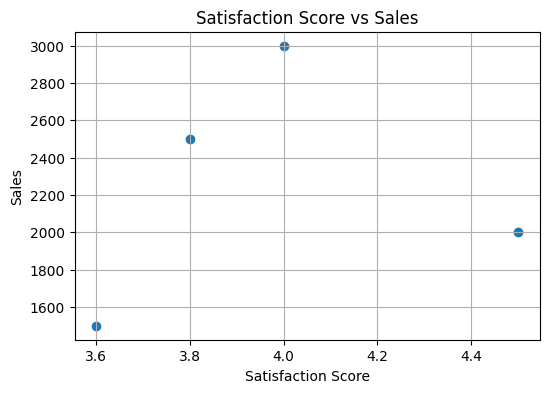

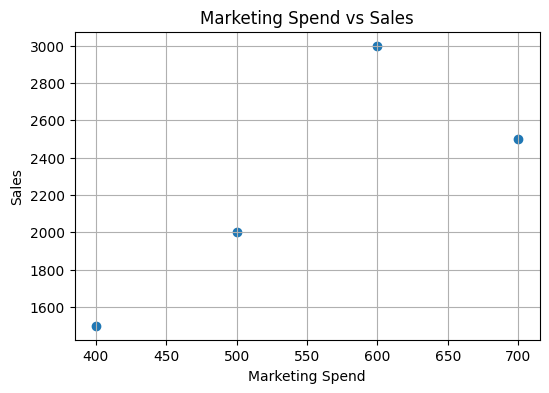

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of Satisfaction Score vs Sales
plt.figure(figsize=(6, 4))
plt.scatter(df_final['Satisfaction_Score'], df_final['Sales'])
plt.title('Satisfaction Score vs Sales')
plt.xlabel('Satisfaction Score')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Scatter plot of Marketing Spend vs Sales
plt.figure(figsize=(6, 4))
plt.scatter(df_final['Marketing_Spend'], df_final['Sales'])
plt.title('Marketing Spend vs Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


## Example

### Step 1: Create Three Separate DataFrames


In [9]:
import pandas as pd

# Data for Electronics
data_electronics = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Electronics': [45000, 47000, 50000, 48000, 46000, 47000]
}
df_electronics = pd.DataFrame(data_electronics)

df_electronics


,Month,Electronics
0,January,45000
1,February,47000
2,March,50000
3,April,48000
4,May,46000
5,June,47000


In [10]:
# Data for Clothing
data_clothing = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Clothing': [30000, 29000, 31000, 28000, 26000, 27000]
}
df_clothing = pd.DataFrame(data_clothing)

df_clothing

,Month,Clothing
0,January,30000
1,February,29000
2,March,31000
3,April,28000
4,May,26000
5,June,27000


In [11]:
# Data for Groceries
data_groceries = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Groceries': [20000, 21000, 22000, 21000, 20500, 23000]
}
df_groceries = pd.DataFrame(data_groceries)

df_groceries

,Month,Groceries
0,January,20000
1,February,21000
2,March,22000
3,April,21000
4,May,20500
5,June,23000


### Step 2: Merge the DataFrames

We will merge these three dataframes based on the Month column using the merge() function.



In [12]:
# Merge Electronics and Clothing data on 'Month'
df_merged = pd.merge()

# Merge the result with Groceries data
df_final = pd.merge()

# Display the merged dataframe
df_final


,Month,Electronics,Clothing,Groceries
0,January,45000,30000,20000
1,February,47000,29000,21000
2,March,50000,31000,22000
3,April,48000,28000,21000
4,May,46000,26000,20500
5,June,47000,27000,23000


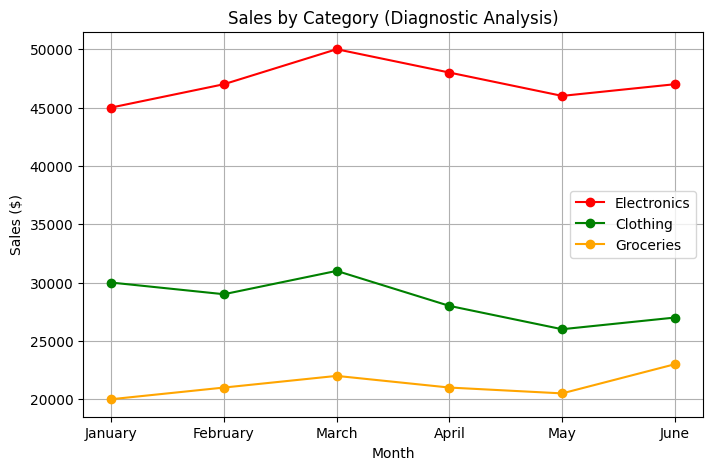

In [13]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(df_final['Month'], df_final['Electronics'], marker='o', color='red', label='Electronics')
plt.plot(df_final['Month'], df_final['Clothing'], marker='o', color='green', label='Clothing')
plt.plot(df_final['Month'], df_final['Groceries'], marker='o', color='orange', label='Groceries')

# Add titles and labels
plt.title('Sales by Category (Diagnostic Analysis)')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Example

### Step 1: Create Separate DataFrames for Winter and Summer Clothing Sales

In [14]:
import pandas as pd

# Data for Winter Clothing Sales
data_winter_clothing = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Winter Clothing Sales': [18000, 16000, 14000, 12000, 10000, 6000]
}
df_winter_clothing = pd.DataFrame(data_winter_clothing)
df_winter_clothing



,Month,Winter Clothing Sales
0,January,18000
1,February,16000
2,March,14000
3,April,12000
4,May,10000
5,June,6000


In [15]:
# Data for Summer Clothing Sales
data_summer_clothing = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June'],
    'Summer Clothing Sales': [12000, 13000, 15000, 16000, 16500, 17000]
}
df_summer_clothing = pd.DataFrame(data_summer_clothing)
df_summer_clothing


,Month,Summer Clothing Sales
0,January,12000
1,February,13000
2,March,15000
3,April,16000
4,May,16500
5,June,17000


### Step 2: Merge the DataFrames

To plot both the Winter and Summer Clothing Sales on the same graph, we need to merge the two dataframes based on the Month column.

In [16]:
# Merge Winter and Summer Clothing data on 'Month'
df_merged_clothing = pd.merge(df_winter_clothing, df_summer_clothing, on='Month')

df_merged_clothing

,Month,Winter Clothing Sales,Summer Clothing Sales
0,January,18000,12000
1,February,16000,13000
2,March,14000,15000
3,April,12000,16000
4,May,10000,16500
5,June,6000,17000


### Step 3: Plot the Merged Data

We now plot the merged data for Winter and Summer Clothing Sales.



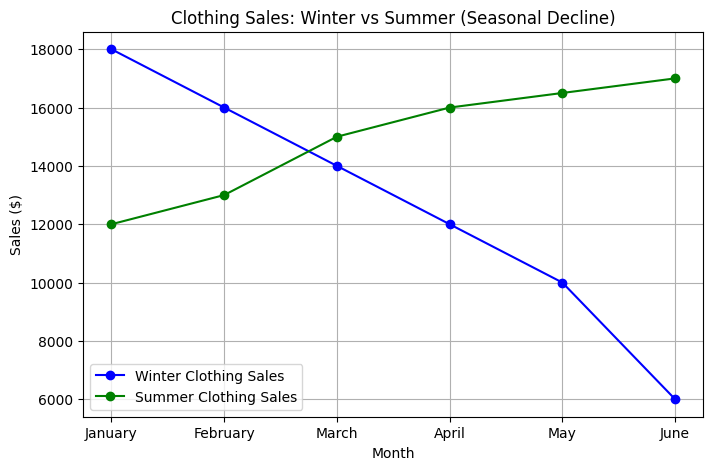

In [17]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 5))

# Winter clothing sales
plt.plot(df_merged_clothing['Month'], df_merged_clothing['Winter Clothing Sales'], marker='o', color='blue', label='Winter Clothing Sales')

# Summer clothing sales
plt.plot(df_merged_clothing['Month'], df_merged_clothing['Summer Clothing Sales'], marker='o', color='green', label='Summer Clothing Sales')

# Add titles and labels
plt.title('Clothing Sales: Winter vs Summer (Seasonal Decline)')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()
